In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [283]:
dados = pd.read_csv('dados_estudantes.csv')
dados.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [284]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [285]:
dados['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

Dados demográficos

In [286]:
dados[['Idade na matrícula', 'Taxa de desemprego', 'Taxa de inflação', 'PIB']].describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB
count,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969
std,7.587816,2.663850,1.382711,2.269935
min,17.000000,7.600000,-0.800000,-4.060000
25%,19.000000,9.400000,0.300000,-1.700000
50%,20.000000,11.100000,1.400000,0.320000
75%,25.000000,13.900000,2.600000,1.790000
max,70.000000,16.200000,3.700000,3.510000


In [287]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',  'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia', 'Target']
dados[colunas_categoricas].describe()


,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


In [288]:
dados['Estado civil'].value_counts(normalize=True)*100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

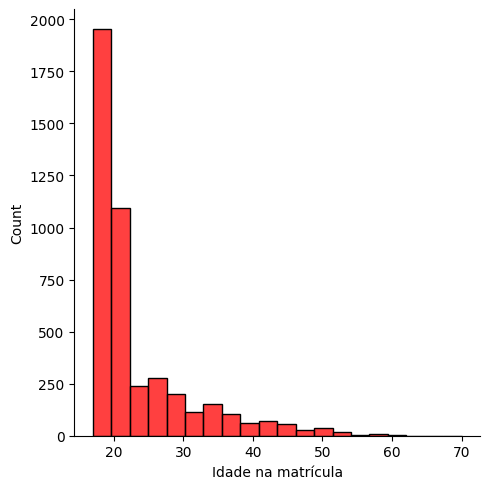

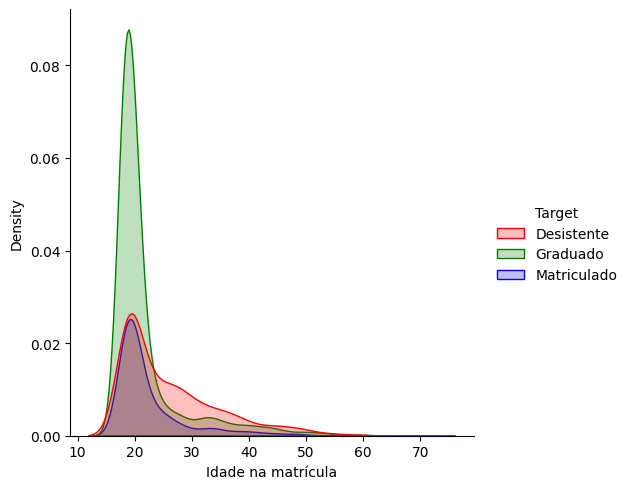

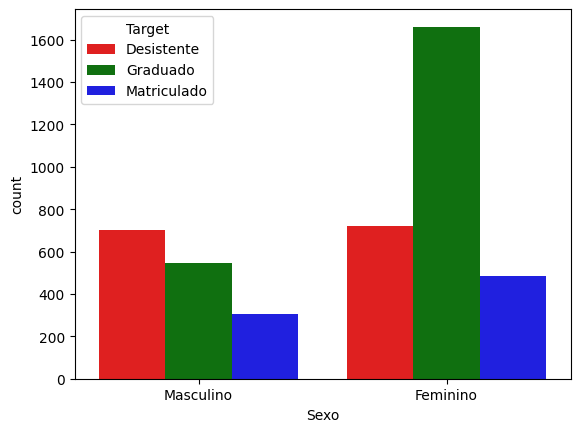

In [289]:
sns.displot(dados['Idade na matrícula'], bins=20)
plt.show()


color_dict = {'Desistente': 'red', 'Graduado': 'green', 'Matriculado': 'blue'}
sns.set_palette(list(color_dict.values())) #Padronizando como paleta de cores


sns.displot(data=dados, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.show() #Distribuição normal dos alunos em relação a sua situação.

sns.countplot(x='Sexo', hue='Target', data=dados)
plt.show()

Dados socioeconômicos e macroeconômicos

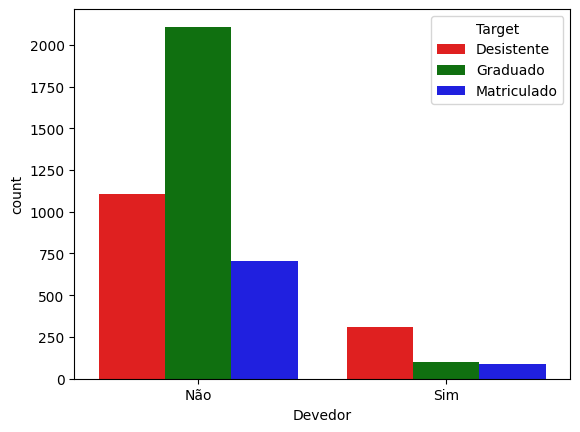

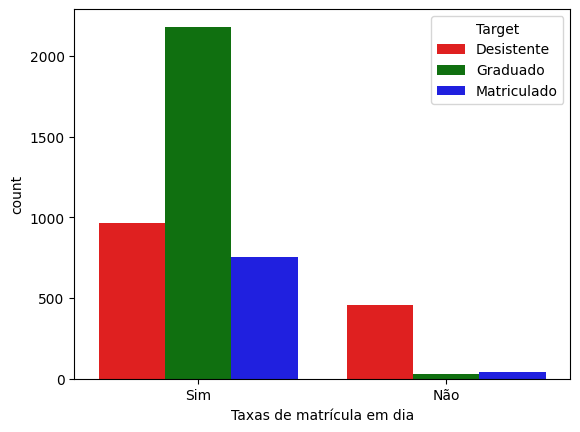

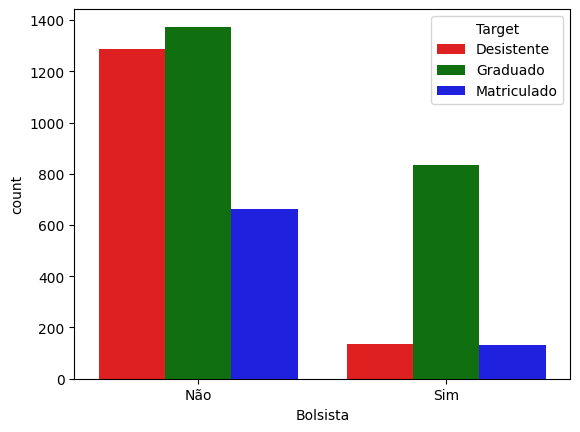

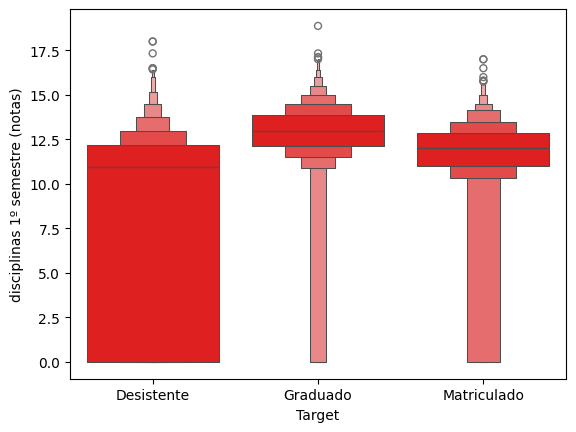

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Target=Desistente<br>Porcentagem=%{x}<br>Curso=%{y}<extra></extra>',
              'legendgroup': 'Desistente',
              'marker': {'color': 'red', 'pattern': {'shape': ''}},
              'name': 'Desistente',
              'offsetgroup': 'Desistente',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([40.95238095, 38.13953488, 22.56637168, 44.27083333, 15.40469974,
                          26.70623145, 54.11764706, 35.26315789, 50.74626866, 35.44776119,
                          30.51359517, 38.37209302, 18.30985915, 33.02325581, 66.66666667,
                          38.0952381 , 55.31914894]),
              'xaxis': 'x',
              'y': array(['Agronomia', 'Animação e Design Multimídia', 'Design de Comunicação',
                          'Educação Básica', 'Enfermagem', 'Enfermagem Veterinária',
                          'Engenharia da computação', 'Gestão', 'Gestão (noturno)',
                          'Gestão de Publicidade e Marketing', 'Jornalismo e Comunicação',
                          'Odontologia', 'Serviço Social', 'Serviço Social (noturno)',
                          'Tecnologias de Produção de Biocombustíveis', 'Turismo', 'Zootecnia'],
                         dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Target=Graduado<br>Porcentagem=%{x}<br>Curso=%{y}<extra></extra>',
              'legendgroup': 'Graduado',
              'marker': {'color': 'green', 'pattern': {'shape': ''}},
              'name': 'Graduado',
              'offsetgroup': 'Graduado',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([41.42857143, 44.65116279, 58.84955752, 29.6875    , 71.54046997,
                          51.03857567,  8.23529412, 36.31578947, 29.10447761, 46.64179104,
                          59.21450151, 41.86046512, 69.85915493, 57.20930233,  8.33333333,
                          45.63492063, 29.78723404]),
              'xaxis': 'x',
              'y': array(['Agronomia', 'Animação e Design Multimídia', 'Design de Comunicação',
                          'Educação Básica', 'Enfermagem', 'Enfermagem Veterinária',
                          'Engenharia da computação', 'Gestão', 'Gestão (noturno)',
                          'Gestão de Publicidade e Marketing', 'Jornalismo e Comunicação',
                          'Odontologia', 'Serviço Social', 'Serviço Social (noturno)',
                          'Tecnologias de Produção de Biocombustíveis', 'Turismo', 'Zootecnia'],
                         dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Target=Matriculado<br>Porcentagem=%{x}<br>Curso=%{y}<extra></extra>',
              'legendgroup': 'Matriculado',
              'marker': {'color': 'blue', 'pattern': {'shape': ''}},
              'name': 'Matriculado',
              'offsetgroup': 'Matriculado',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([17.61904762, 17.20930233, 18.5840708 , 26.04166667, 13.05483029,
                          22.25519288, 37.64705882, 28.42105263, 20.14925373, 17.91044776,
                          10.27190332, 19.76744186, 11.83098592,  9.76744186, 25.        ,
                          16.26984127, 14.89361702]),
              'xaxis': 'x',
              'y': array(['Agronomia', 'Animação e Design Multimídia', 'Design de Comunicação',
                          'Educação Básica', 'Enfermagem', 'Enfermagem Veterinária',
                          'Engenharia da computação', 'Gestão', 'Gestão (noturno)',
                          'Gestão de Publicida

In [290]:
sns.countplot(x='Devedor', hue='Target', data=dados)
plt.show()

sns.countplot(x='Taxas de matrícula em dia', hue='Target', data=dados)
plt.show()

sns.countplot(x='Bolsista', hue='Target', data=dados)
plt.show()

sns.boxenplot(x='Target', y='disciplinas 1º semestre (notas)', data=dados)
plt.show()


contagem = dados.groupby(['Curso', 'Target']).size().reset_index(name='Contagem')
contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum())*100)

fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h',
             color_discrete_map=color_dict)
fig


Dados Acadêmicos

In [291]:
dados['Target'].value_counts(normalize=True)*100

Target
Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: proportion, dtype: float64

In [292]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor', 
                       'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia']
encoder = OneHotEncoder(drop='if_binary')
dados_categoricos = dados[colunas_categoricas]
dados_encoded = pd.DataFrame(encoder.fit_transform(dados_categoricos).toarray(), 
                             columns=encoder.get_feature_names_out(colunas_categoricas))

dados_final = pd.concat([dados.drop(colunas_categoricas, axis=1), dados_encoded], axis=1)
dados_final

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 65 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Idade na matrícula                                                            4424 non-null   int64  
 1   Taxa de desemprego                                                            4424 non-null   float64
 2   Taxa de inflação                                                              4424 non-null   float64
 3   PIB                                                                           4424 non-null   float64
 4   disciplinas 1º semestre (creditadas)                                          4424 non-null   int64  
 5   disciplinas 1º semestre (matriculadas)                                        4424 non-null   int64  
 6   disciplinas 1º semestre (avaliaç

In [294]:
x = dados_final.drop(['Target'], axis=1)
y = dados_final['Target']

Separando os dados em datasets de treino, validação e teste.

In [295]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=0)
x_treino, x_val, y_treino, y_val  = train_test_split(x, y, stratify=y, random_state=0)

In [296]:
rfmodel = RandomForestClassifier(random_state=0, max_depth=5)
rfmodel.fit(x_treino, y_treino)
y_predval = rfmodel.predict(x_val) #Validação
print(f'Acurácia de Treino:{rfmodel.score(x_treino, y_treino)}')
print(f'Acurácia de Validação:{rfmodel.score(x_val, y_val)}')
print('Previsão Validação: ', y_predval)

Acurácia de Treino:0.7510638297872341
Acurácia de Validação:0.7393617021276596
Previsão Validação:  ['Graduado' 'Graduado' 'Graduado' 'Desistente' 'Graduado' 'Desistente'
 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Graduado'
 'Desistente' 'Graduado' 'Desistente' 'Desistente' 'Graduado' 'Graduado'
 'Desistente' 'Graduado' 'Desistente' 'Graduado' 'Desistente' 'Desistente'
 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Desistente'
 'Graduado' 'Graduado' 'Graduado' 'Desistente' 'Desistente' 'Desistente'
 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Graduado'
 'Graduado' 'Graduado' 'Graduado' 'Desistente' 'Desistente' 'Desistente'
 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Desistente' 'Desistente'
 'Graduado' 'Desistente' 'Desistente' 'Graduado' 'Graduado' 'Graduado'
 'Desistente' 'Graduado' 'Desistente' 'Graduado' 'Graduado' 'Graduado'
 'Graduado' 'Desistente' 'Graduado' 'Graduado' 'Desistente' 'Graduado'
 'Graduado' 'Graduado' 'Desistente' 'Graduado' '

In [297]:
y_predtest = rfmodel.predict(x_test)
print('Previsão Teste: ',y_predtest)


Previsão Teste:  ['Graduado' 'Desistente' 'Graduado' 'Desistente' 'Desistente' 'Desistente'
 'Desistente' 'Desistente' 'Graduado' 'Graduado' 'Graduado' 'Graduado'
 'Graduado' 'Graduado' 'Graduado' 'Desistente' 'Desistente' 'Graduado'
 'Desistente' 'Matriculado' 'Graduado' 'Desistente' 'Graduado'
 'Desistente' 'Graduado' 'Desistente' 'Graduado' 'Graduado' 'Desistente'
 'Graduado' 'Desistente' 'Graduado' 'Graduado' 'Graduado' 'Graduado'
 'Desistente' 'Graduado' 'Graduado' 'Graduado' 'Desistente' 'Graduado'
 'Graduado' 'Desistente' 'Desistente' 'Desistente' 'Desistente' 'Graduado'
 'Graduado' 'Graduado' 'Graduado' 'Desistente' 'Graduado' 'Graduado'
 'Graduado' 'Graduado' 'Graduado' 'Desistente' 'Desistente' 'Graduado'
 'Desistente' 'Desistente' 'Desistente' 'Desistente' 'Graduado' 'Graduado'
 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Graduado'
 'Desistente' 'Graduado' 'Graduado' 'Desistente' 'Desistente' 'Desistente'
 'Graduado' 'Graduado' 'Graduado' 'Graduado' 'Desistente' 

Análise de métricas no Treino

In [298]:
cm = confusion_matrix(y_val, y_predval)
cm

array([[238,  63,   1],
       [ 17, 450,   2],
       [ 64,  98,   7]], dtype=int64)

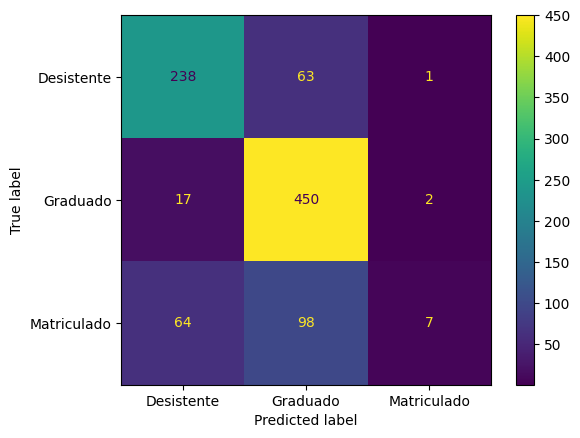

In [299]:
visual = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfmodel.classes_)
visual.plot();

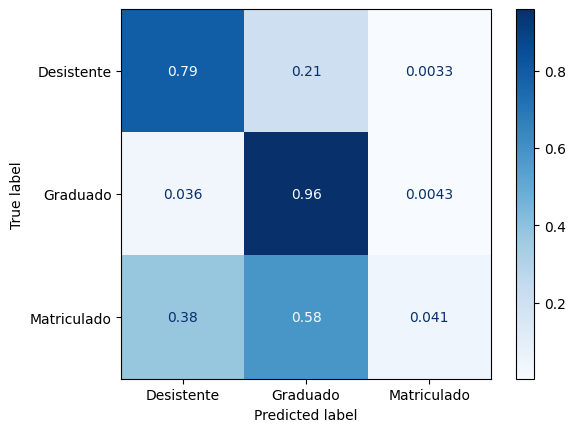

In [300]:
ConfusionMatrixDisplay.from_predictions(y_val, y_predval, normalize='true', cmap='Blues');

In [301]:
report = classification_report(y_val, y_predval)
print('Relatório de Classificação:') 
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

  Desistente       0.75      0.79      0.77       302
    Graduado       0.74      0.96      0.83       469
 Matriculado       0.70      0.04      0.08       169

    accuracy                           0.74       940
   macro avg       0.73      0.60      0.56       940
weighted avg       0.73      0.74      0.68       940



Análise de métricas no teste

In [302]:
cm1 = confusion_matrix(y_test, y_predtest)
cm1

array([[174,  39,   0],
       [ 17, 315,   0],
       [ 45,  69,   5]], dtype=int64)

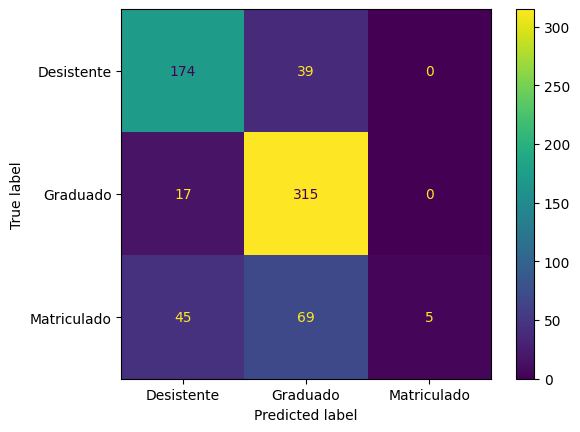

In [303]:
visual1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=rfmodel.classes_)
visual1.plot();

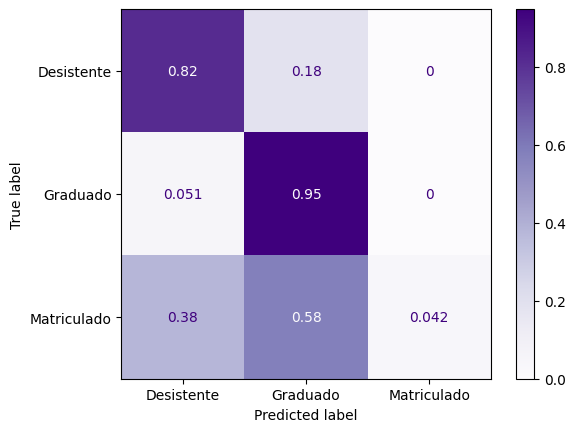

In [304]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predtest, normalize='true', cmap='Purples');

In [305]:
report = classification_report(y_test, y_predtest)
print('Relatório de Classificação:') 
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

  Desistente       0.74      0.82      0.78       213
    Graduado       0.74      0.95      0.83       332
 Matriculado       1.00      0.04      0.08       119

    accuracy                           0.74       664
   macro avg       0.83      0.60      0.56       664
weighted avg       0.79      0.74      0.68       664



Aplicação da Técnica de Superamostragem

In [306]:
y_treino.value_counts()

Target
Graduado       1408
Desistente      906
Matriculado     506
Name: count, dtype: int64

In [307]:
over_sample = SMOTE(random_state=0)
x_balanceado, y_balanceado = over_sample.fit_resample(x_treino, y_treino)

In [308]:
y_balanceado.value_counts()

Target
Desistente     1408
Graduado       1408
Matriculado    1408
Name: count, dtype: int64

In [309]:
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo.predict(x_val)

              precision    recall  f1-score   support

  Desistente       0.86      0.73      0.79       302
    Graduado       0.81      0.87      0.84       469
 Matriculado       0.51      0.54      0.52       169

    accuracy                           0.77       940
   macro avg       0.72      0.71      0.72       940
weighted avg       0.77      0.77      0.77       940



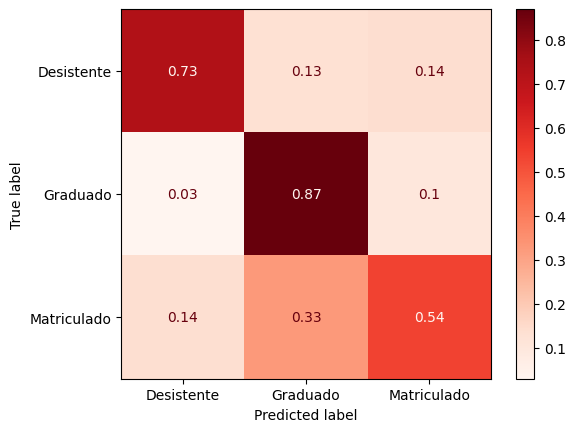

In [310]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Reds');

In [ ]:
modelo = RandomForestClassifier()